In [1]:
import numpy as np
import pandas as pd
from datetime import date
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
'''
Authors: 
Andrea Pimpinella <andrea.pimpinella@polimi.it>,
Alessandro E. C. Redondi <alessandroenrico.redondi@polimi.it>
Antonio Capone  <alessandroenrico.redondi@polimi.it>

This code preprocesses raw data to observe the impact of Covid19 pandemic on cellular networks.
use case.
'''

'\nAuthors: \nAndrea Pimpinella <andrea.pimpinella@polimi.it>,\nAlessandro E. C. Redondi <alessandroenrico.redondi@polimi.it>\nAntonio Capone  <alessandroenrico.redondi@polimi.it>\n\nThis code preprocesses raw data and perform features extraction for Prediction Model of Video Quality Long Term QoE\nuse case.\n'

# Import Data


In [6]:
# Use this Section to import the data files provided in the project folder.

# NETWORK KPI
# Choose the geographic location (i.e. Milan) and the reference month (either January, February or March):


# PUT YOUR OWN FILE PATH!
file_path = '/Users/andreapimpinella/Desktop/Deliverable/Data/Pkl_Files/'

# KPIs
data = pd.read_pickle(file_path+'Milano_800_January_MRN.pkl')

# Cells Location:
locations = pd.read_pickle(file_path+'Coordinates_MILANO.pkl')

# For reference about python pandas data structure, look at:
# https://pandas.pydata.org

# This section shows some information regarding the dataset
print(20*'*')
print('Data types:\n')
print(data.dtypes)
print(20*'*')  
print('Number of data points: ', len(data))
print('Number of columns in the dataset: ', len(data.columns))
print(20*'*')




********************
Data types:

REGIONE                         object
COMUNE                          object
Date                    datetime64[ns]
ECELL_ID                        object
DL_BW                          float64
RRC_S_SR                       float64
RRC_RE_SR                      float64
ERAB_S_SR                      float64
CS_SR                          float64
IntraF_Hout_SR                 float64
InterF_Hout_SR                 float64
Hin_SR                         float64
InterR_HO_SR_OUT_E2W           float64
InterR_HO_SR_OUT_E2G           float64
DL_VOL                         float64
UL_VOL                         float64
DL_THR_AVG                     float64
UL_THR_AVG                     float64
DL_THR_MAX                     float64
UL_THR_MAX                     float64
USERNUM_AVG                     object
USERNUM_MAX                    float64
PRB_DL_Used_Avg                float64
PRB_UL_Used_Avg                float64
dtype: object
****************

In [7]:
locations.drop_duplicates(subset='ECELL_ID').head()

,ECELL_ID,LONG_X,LAT_Y
ENODEB_ID,,,
930b285c764e554f338f671864b30d3941935b00,b7de6cd46e855aaec8e28b26d1767e7a738819db,9.20843315124512,45.4453582763672
930b285c764e554f338f671864b30d3941935b00,3821116bcdc789c9d54369ddd58b8e75fafdcb59,9.20843315124512,45.4453582763672
930b285c764e554f338f671864b30d3941935b00,9ed9d0f30e21c0218c987496c433e11dd611c9d2,9.20843315124512,45.4453582763672
930b285c764e554f338f671864b30d3941935b00,9ba7c2a7f2ae3a32003cd92d0ce82fdd734f1d7f,9.20843315124512,45.4453582763672
930b285c764e554f338f671864b30d3941935b00,ce8ca39728288e4065ec86b14e902807327427ff,9.20843315124512,45.4453582763672


In [8]:
# Here you can understand the size of the scenario, e.g. how many cells you are considering.
print('Number of (distinct) cells: ', len(data.drop_duplicates(subset='ECELL_ID')))


Number of (distinct) cells:  398


# Data Pre-Processing

In [9]:
# Usually, it is interesting to recognize weekly trends in network related KPIs. The idea is to compare, for the
# considered KPIs, a typical weekly trend (i.e. in our case, before Covid-19 outbreak) 
#with that one happening after the reference phenomenon (i.e., in our case, the Covid-19 outbreak).
# In this section, the second week of January (Monday 12th - Sunday 20th January 2020) 
#is extracted from raw data, conditioning on the field "Date":

# January
week_three = data[data['Date'] < pd.Timestamp(year=2020, month=1, day=20, hour = 0, minute =1)]
week_three = week_three[week_three['Date'] > pd.Timestamp(year=2020, month=1, day=12, hour = 23, minute =59)]

week_three.head()

,REGIONE,COMUNE,Date,ECELL_ID,DL_BW,RRC_S_SR,RRC_RE_SR,ERAB_S_SR,CS_SR,IntraF_Hout_SR,...,DL_VOL,UL_VOL,DL_THR_AVG,UL_THR_AVG,DL_THR_MAX,UL_THR_MAX,USERNUM_AVG,USERNUM_MAX,PRB_DL_Used_Avg,PRB_UL_Used_Avg
288,LOMBARDIA,MILANO,2020-01-13 08:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0,99.982178,71.428571,99.943675,20098.0,100.000000,...,16315960.0,1801176.0,4461.75,466.75,54066.0,14467.0,None,0.0,4.6125,2.4675
289,LOMBARDIA,MILANO,2020-01-13 13:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0,99.920582,72.941176,99.958592,27179.0,97.802198,...,26234008.0,2869336.0,7194.00,744.50,56065.0,22918.0,None,0.0,5.4300,3.5500
290,LOMBARDIA,MILANO,2020-01-13 12:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0,99.856092,85.567010,99.968708,22086.0,100.000000,...,19980736.0,2411952.0,5462.50,629.25,50432.0,5110.0,None,0.0,4.9725,3.2325
291,LOMBARDIA,MILANO,2020-01-13 11:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0,99.919524,91.799544,99.915218,21857.0,100.000000,...,19699512.0,3276264.0,5389.75,864.75,85376.0,8679.0,None,0.0,4.0225,4.0750
292,LOMBARDIA,MILANO,2020-01-13 10:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0,99.848892,55.000000,99.913401,21141.0,100.000000,...,24225312.0,3523232.0,6638.00,930.00,67311.0,10119.0,None,0.0,4.9550,3.6800


In [10]:
# Typically, daily and night KPIs traces are analysed differently, as network users 
# show very different behaviours depending on the two moments. 
#In this section, the first week data are grouped into Daily (from 6AM to 24 PM) 
# and Night (from 00 AM to 6 AM) Data

# January
week_three_day = week_three.set_index('Date').between_time('06:00:00', '23:59:59')
week_three_night = week_three.set_index('Date').between_time('00:00:00', '05:59:59')


In [11]:
# Raw data are provided as hourly samples, but it might be intereseting to consider also under-sampled 
# versions of the data. For instance, it is possible to resample the dataset to obtain daily aggregation of KPIs.
# E.g. in this section the KPI reporting the average number of connected users ('USERNUM_AVG') is considered
# for a particular cell ID ('360767189319c367c8a7b4cf84a32a7841b3678f') and related data are aggregated to produce
# several Daily statistics for :

cell_id = 'c945addeee641c3b7e7098fe8cad5defe032223c' # this is a city center cell
ref_KPI = 'DL_VOL' # KPI to analyse: DL_VOl is expressed in bits

temp = week_three_day.loc[week_three_day['ECELL_ID']==cell_id,[ref_KPI]] # reference data

# Extract Statistics
median = temp.resample('D').agg({ref_KPI: np.median})
avg = temp.resample('D').agg({ref_KPI: np.mean})
std = temp.resample('D').agg({ref_KPI: np.std})

daily_stat = pd.DataFrame(index=median.index, columns = ['Median','Average','Standard_Deviaiton'])

daily_stat.Median = median.values
daily_stat.Average = avg.values
daily_stat.Standard_Deviaiton = std.values


daily_stat.head()

# For reference about pandas.DataFrame.resample method, please look at:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html


,Median,Average,Standard_Deviaiton
Date,,,
2020-01-13,16214972.0,1.509998e+07,1.070864e+07
2020-01-14,18374712.0,1.493930e+07,8.941285e+06
2020-01-15,15315368.0,1.324080e+07,8.384022e+06
2020-01-16,9518384.0,1.403120e+07,1.015525e+07
2020-01-17,14755860.0,1.364577e+07,1.030489e+07


# Data Visualization

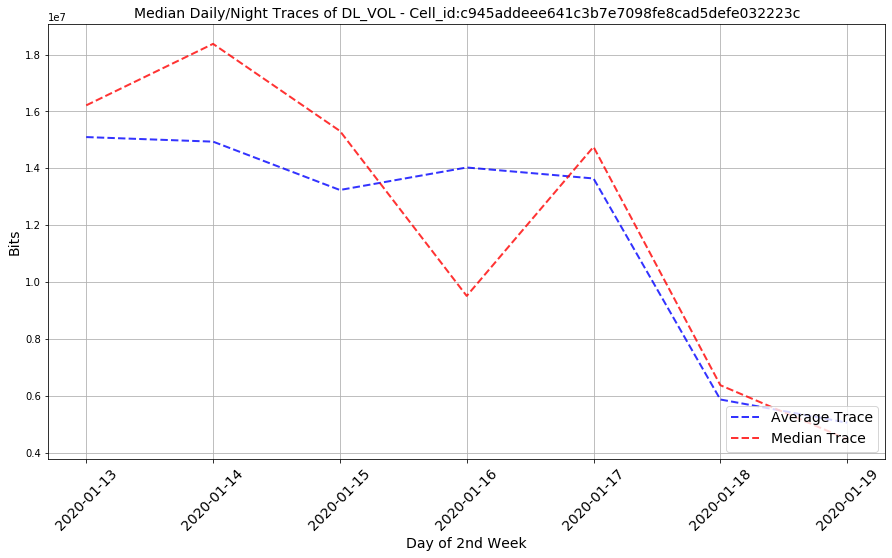

In [12]:
# This section plots the average/median daily number of connected users to the cell taken as example

# open new figure
fig, ax = plt.subplots(figsize=(15,8))

# plot data
ax.plot(list(range(1,len(daily_stat)+1)),daily_stat['Average'], linestyle='--', lw=2, color='b',label='Average Trace', alpha=.8) 
ax.plot(list(range(1,len(daily_stat)+1)),daily_stat['Median'], linestyle='--', lw=2, color='r',label='Median Trace', alpha=.8) 


# Set plotting option
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(1)
plt.xticks(ticks = range(1,len(daily_stat)+1) ,labels = list(daily_stat.index.date), fontsize = 14, rotation=45)
plt.xlabel('Day of 2nd Week', color='black', fontsize=14)
plt.ylabel('Bits', color='black', fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.title('Median Daily/Night Traces of '+ref_KPI+' - Cell_id:%s'%cell_id, fontsize=14)
plt.show()

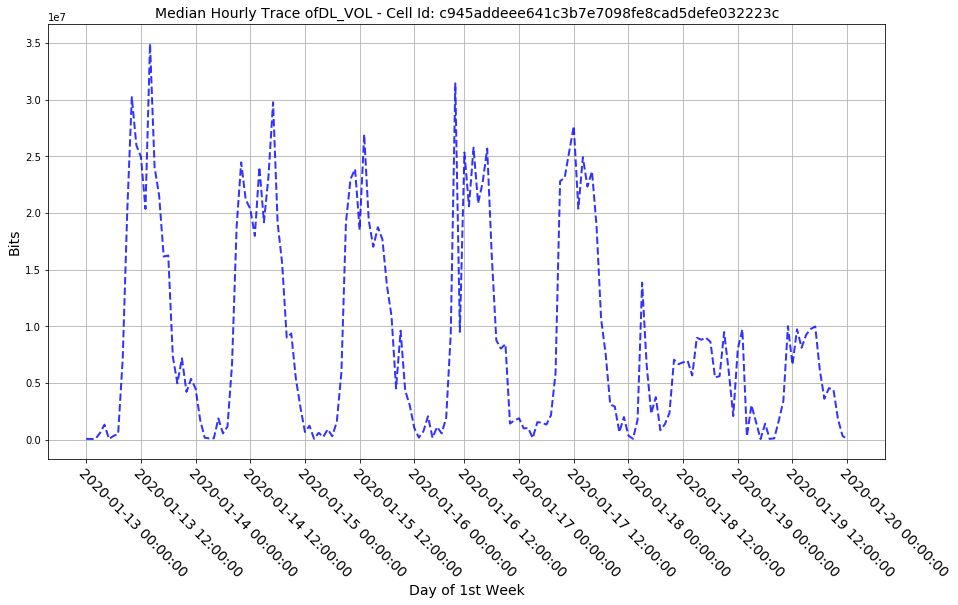

In [13]:
# This section plots the Median hourly number of connected users to the cell taken as example 

# Sort hourly samples by date
ref = week_three.set_index('ECELL_ID').sort_values('Date').loc[cell_id,['Date',ref_KPI]]

# open new figure
fig, ax = plt.subplots(figsize=(15,8))

# plot data
ax.plot(list(range(0,len(ref))),ref[ref_KPI], linestyle='--', lw=2, color='b', alpha=.8) 

# Set plotting options
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(1)
ticks_label = ref.reset_index().set_index('Date').sort_values(by='Date').index
ticks = [0, 12, 24, 36, 48, 60, 72, 83, 95, 107, 119, 131, 143, 155, 167] # indexes of 00.00 and 12.00 timestamps 
#of each week day
plt.xticks(ticks = ticks,labels = ticks_label[ticks],fontsize = 14)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
plt.xlabel('Day of 1st Week', color='black', fontsize=14)
plt.ylabel('Bits', color='black', fontsize=14) # unit of measure depends on the considered KPI
plt.title('Median Hourly Trace of'+ref_KPI+' - Cell Id: %s'%cell_id, fontsize=14)
plt.show()

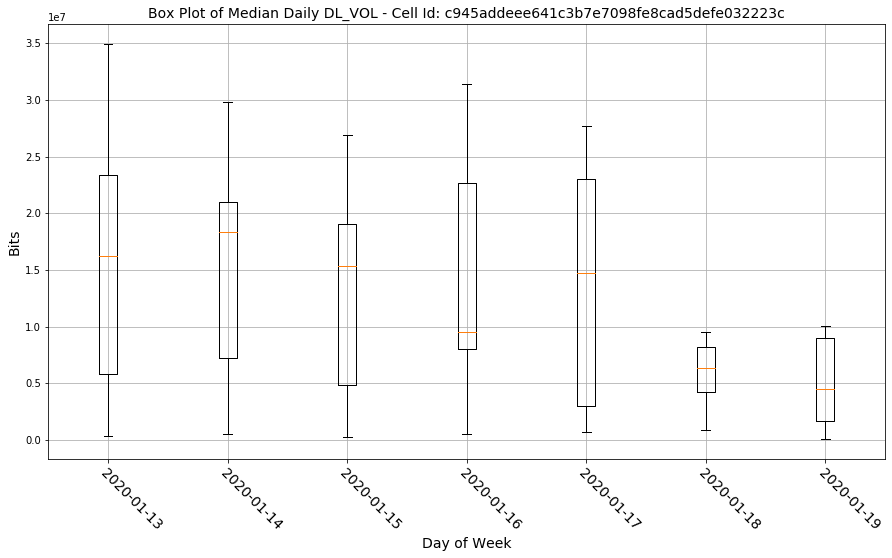

In [14]:
# This section makes a box plot of the daily statiscs regarding the number of connected 
# users to the cell taken as example. For each day, the following statistics are extracted from the considered
# KPI:
# - Median Value
# - 25th and 75th Quantiles
# - Max and Min values

# For reference about how to read a box plot go here: 
# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

# open new figure
fig, ax = plt.subplots(figsize=(15,8))

# Create temporary variables

ref = temp.reset_index()
days = list(np.unique(ref['Date'].dt.day))
xtick = list(range(len(days)))



# For each day of the week, make the box plot of the corresponding hourly trace
for day in days:
    
    series = ref[ref['Date'].dt.day == day]
    ax.boxplot(series[ref_KPI], positions = [xtick[days.index(day)]])

# Set plotting options
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(1)
plt.xticks(ticks = xtick,labels = list(np.unique(ref.set_index('Date').index.date)),fontsize = 14)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
plt.xlabel('Day of Week', color='black', fontsize=14)
plt.ylabel('Bits', color='black', fontsize=14)
plt.title('Box Plot of Median Daily '+ref_KPI+' - Cell Id: %s'%cell_id, fontsize=14)
plt.show()

